# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import pytesseract
from kraken import pageseg
import math

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [2]:
# define a function to get (name, image, text) from a zip file
def zip_images_extraction(name):
    """
    get all the information (name, image, text) from a zip file
    
    :input: the name of a zip file
    :output: a list of dictoionaries. Each dictionary contains the all the information 
    (name, image, text) of a image object.
    
    """
    # zip name
    zip_name = 'readonly/' + name
    
    # output
    out = []
    
    # index out all the information
    with zipfile.ZipFile(zip_name) as myzip:
        zip_infos = myzip.infolist()
        
        for ele in zip_infos:
            # name
            name = ele.filename
            # image
            img = Image.open(myzip.open(name))
            # text
            img_strs = pytesseract.image_to_string(img.convert('L'))
            
            # test if "Christopher" or "Mark" are in the text
            if ("Christopher" in img_strs) or ("Mark" in img_strs):
                 # example of dictionary
                my_dic = {"name":name, "img":img, "text":img_strs}
                out.append(my_dic)
    return out

In [3]:
# extract all the information related to small_img.zip and images.zip
small_imgs = zip_images_extraction("small_img.zip")

# big_imgs will be here latter
#big_imgs = zip_images_extraction("images.zip")

In [4]:

# big_imgs will be here latter
big_imgs = zip_images_extraction("images.zip")

In [5]:
# define a function to extract a list of faces
# create a contact sheet for these faces
def extract_faces(img, scale_factor):
    """
    gray is in array form
    """
    # extract the retangle of the faces
    gray = np.array(img.convert("L"))
    faces = face_cascade.detectMultiScale(gray, scale_factor)
    
    # if no faces are detected
    if (len(faces) == 0):
        return None
    
    # extract faces into the list imgs
    faces_imgs = []
    
    for x,y,w,h in faces:
        faces_imgs.append(img.crop((x,y,x+w,y+h)))
    
    # compute nrows and ncols
    ncols = 5
    nrows = math.ceil(len(faces) / ncols)
    
    # contact sheet
    contact_sheet=Image.new(img.mode, (550, 110*nrows))
    x, y = (0, 0)
    
    for face in faces_imgs:
        face.thumbnail((110,110))
        contact_sheet.paste(face, (x,y))
        
        if x+110 == contact_sheet.width:
            x = 0
            y += 110
        else:
            x += 110
            
    return contact_sheet

In [6]:
# define the search function
def value_search(value, zip_name, scale_factor):
    if zip_name == "small_img.zip":
        ref_imgs = small_imgs
    else:
        ref_imgs = big_imgs
    
    for ele in ref_imgs:
        # test if value is in the text
        if value in ele["text"]:
            # print out the name of the figure
            print("Results found in file {}".format(ele["name"]))
        
            # index out the faces
            img = ele["img"]
            contact_sheet = extract_faces(img, scale_factor)
            if contact_sheet is not None:
                display(contact_sheet)
            else:
                print("But there were no faces in that file")


Results found in file a-0.png


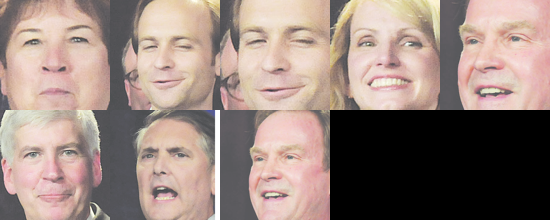

Results found in file a-3.png


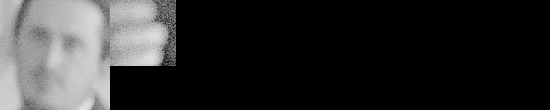

In [9]:
# reproduce the search for "Christopher"
value = "Christopher"
zip_name = "small_img.zip"

value_search(value, zip_name, scale_factor = 1.4)


Results found in file a-0.png


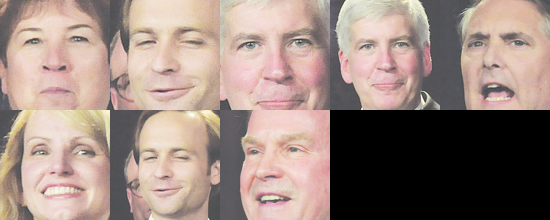

Results found in file a-1.png


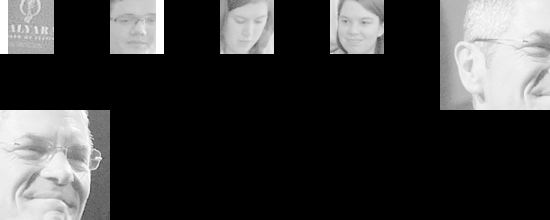

Results found in file a-10.png
But there were no faces in that file
Results found in file a-13.png


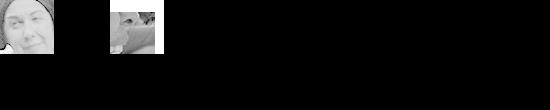

Results found in file a-2.png


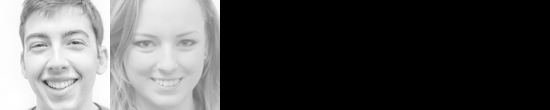

Results found in file a-3.png


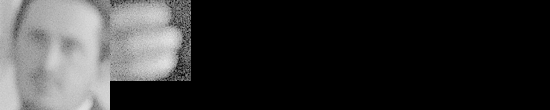

Results found in file a-8.png


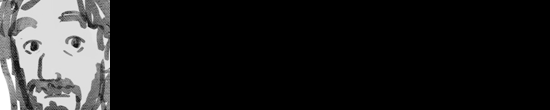

In [8]:
# reproduce the search for "Christopher"
value = "Mark"
zip_name = "images.zip"

value_search(value, zip_name, scale_factor = 1.5)